## Use k-means clustering as a way for image compression

In [1]:
import scipy as sp
from sklearn import cluster, datasets

In [2]:
from scipy import misc
face = misc.face(gray=True)

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

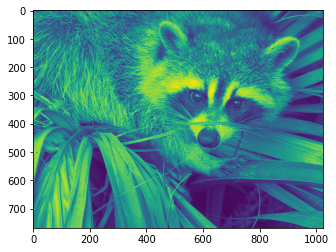

In [5]:
plt.imshow(face) #works

In [6]:
face.shape

(768, 1024)

In [7]:
k_means = cluster.KMeans(n_clusters=5, n_init=1)

In [8]:
k_means.fit(face)

KMeans(n_clusters=5, n_init=1)

In [9]:
values = k_means.cluster_centers_.squeeze()

In [10]:
values.shape

(5, 1024)

In [11]:
labels = k_means.labels_

In [12]:
labels.shape

(768,)

In [13]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [14]:
#face_compressed = np.choose(labels, values)
labels.shape=(768,1) #the default shape is (768,) and it is not working
face_compressed = np.choose(labels, values)

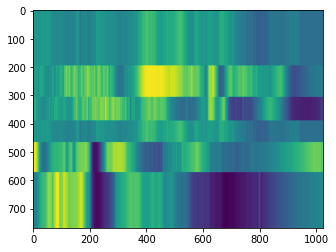

In [15]:
plt.imshow(face_compressed)

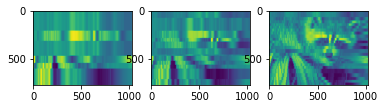

In [21]:
fig, ax = plt.subplots(1, 3)
j = 0
for i in [5,10,25]: #,30,40,50,60,70,80,90,100]:  
    #it looks it cannot go beyond n=30, but I can already see the difference in having different numbers of clusters
    #when it is above 30, there will be errors
    k_means = cluster.KMeans(n_clusters=i, n_init=1)
    k_means.fit(face)
    values = k_means.cluster_centers_.squeeze()
    labels = k_means.labels_
    labels.shape=(768,1) #the default shape is (768,) and it is not working
    face_compressed = np.choose(labels, values)
    ax[j].imshow(face_compressed)
    j+=1
    outputname="Kmeans_%s_cat.png" % (i)
    plt.savefig(outputname)
